In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('tech_store_sales_data/Sales_April_2019.csv')

In [10]:
files = [file for file in os.listdir('tech_store_sales_data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('tech_store_sales_data/'+ file )
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

In [12]:
all_data = pd.read_csv('all_data.csv')
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
40453,305259,iPhone,1,700,12/22/19 18:58,"467 Center St, Boston, MA 02215"
45838,310417,Macbook Pro Laptop,1,1700,12/06/19 09:48,"109 Sunset St, Los Angeles, CA 90001"
97694,215671,iPhone,1,700,06/07/19 13:58,"585 Forest St, New York City, NY 10001"
96340,214385,27in FHD Monitor,1,149.99,06/18/19 20:45,"346 6th St, New York City, NY 10001"
30499,295759,Wired Headphones,1,11.99,12/25/19 06:53,"15 Pine St, New York City, NY 10001"


In [13]:
all_data.shape

(186850, 6)

In [14]:
all_data.dropna(inplace=True)

In [15]:
all_data.shape

(186305, 6)

In [20]:
all_data = all_data[all_data['Order Date'] != 'Order Date']

In [22]:
all_data.shape

(185950, 7)

In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


## 1. What was the best month for sales? How much was earned that month?

In [25]:
# create month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
124476,197881,Macbook Pro Laptop,1,1700,05/29/19 01:35,"511 Wilson St, Atlanta, GA 30301",5
147986,289170,34in Ultrawide Monitor,1,379.99,11/29/19 10:23,"769 Maple St, Los Angeles, CA 90001",11
119169,175289,ThinkPad Laptop,1,999.99,03/19/19 12:53,"698 Cedar St, Portland, OR 97035",3
23960,242022,Wired Headphones,2,11.99,08/19/19 19:02,"96 Hickory St, Atlanta, GA 30301",8
177028,249935,AA Batteries (4-pack),1,3.84,09/12/19 00:22,"794 Highland St, Seattle, WA 98101",9


In [29]:
# add a sales column
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [30]:
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
5865,182161,AAA Batteries (4-pack),2,2.99,04/24/19 16:48,"135 Maple St, Atlanta, GA 30301",4,5.98
129872,203005,USB-C Charging Cable,1,11.95,05/04/19 10:20,"90 Willow St, Los Angeles, CA 90001",5,11.95
66535,161047,Lightning Charging Cable,1,14.95,02/13/19 07:09,"492 Jackson St, San Francisco, CA 94016",2,14.95
172465,276221,27in 4K Gaming Monitor,1,389.99,10/27/19 22:51,"739 4th St, San Francisco, CA 94016",10,389.99
118265,174425,27in FHD Monitor,1,149.99,03/15/19 13:02,"291 Spruce St, Los Angeles, CA 90001",3,149.99


In [33]:
sales = all_data.groupby('Month')['Sales'].sum()

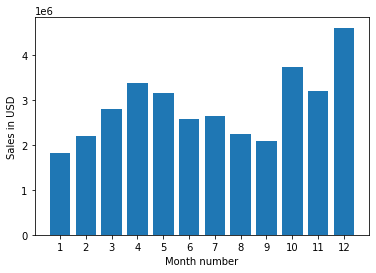

In [43]:
month = range(1,13)
plt.bar(month, sales)
plt.xticks(month)
plt.xlabel('Month number')
plt.ylabel('Sales in USD');

## What US city had the highest number of sales?

In [44]:
# add a city column
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
138896,280497,Bose SoundSport Headphones,1,99.99,11/09/19 09:33,"674 Hickory St, Boston, MA 02215",11,99.99,Boston
1081,177585,AA Batteries (4-pack),1,3.84,04/13/19 01:49,"196 11th St, San Francisco, CA 94016",4,3.84,San Francisco
162027,266275,27in FHD Monitor,1,149.99,10/08/19 21:38,"997 Hickory St, San Francisco, CA 94016",10,149.99,San Francisco
123801,197237,Macbook Pro Laptop,1,1700.00,05/29/19 16:21,"900 4th St, San Francisco, CA 94016",5,1700.00,San Francisco
99958,217856,Bose SoundSport Headphones,1,99.99,06/15/19 15:24,"226 South St, New York City, NY 10001",6,99.99,New York City


In [48]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
47139,311670,Bose SoundSport Headphones,1,99.99,12/20/19 12:01,"112 North St, Boston, MA 02215",12,99.99,Boston (MA)
178659,251506,iPhone,1,700.00,09/25/19 18:50,"601 Lakeview St, Seattle, WA 98101",9,700.00,Seattle (WA)
149139,290273,Lightning Charging Cable,1,14.95,11/04/19 11:40,"161 West St, Los Angeles, CA 90001",11,14.95,Los Angeles (CA)
10045,186144,27in 4K Gaming Monitor,1,389.99,04/12/19 10:58,"111 Main St, Portland, OR 97035",4,389.99,Portland (OR)
176197,249143,ThinkPad Laptop,1,999.99,09/01/19 20:18,"349 10th St, Austin, TX 73301",9,999.99,Austin (TX)


In [50]:
high_sales = all_data.groupby('City').sum()
high_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


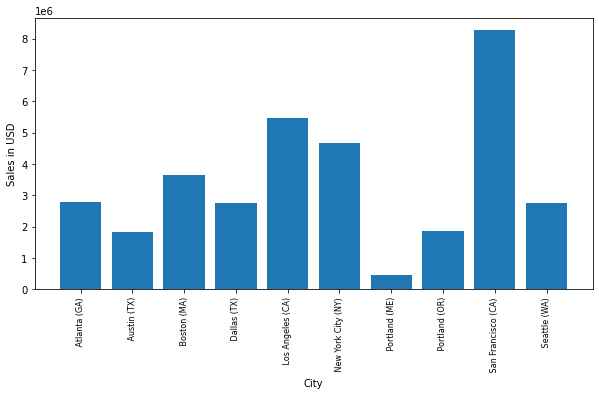

In [63]:
city = [city for city,df in all_data.groupby('City')]
plt.figure(figsize=(10,5))
plt.bar(city, high_sales['Sales'])
plt.xticks(city, rotation='vertical', fontsize=8)
plt.xlabel('City')
plt.ylabel('Sales in USD');

## 3. What time should we display adverts to maximize likelihood of customer's buying product?

In [64]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [65]:
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
78694,224283,Flatscreen TV,1,300.00,2019-07-10 16:19:00,"128 Lakeview St, Atlanta, GA 30301",7,300.00,Atlanta (GA)
135320,208208,Bose SoundSport Headphones,1,99.99,2019-05-31 20:56:00,"526 Church St, Los Angeles, CA 90001",5,99.99,Los Angeles (CA)
180758,253520,Apple Airpods Headphones,1,150.00,2019-09-16 15:40:00,"940 Hickory St, San Francisco, CA 94016",9,150.00,San Francisco (CA)
166183,270238,Bose SoundSport Headphones,1,99.99,2019-10-13 19:50:00,"340 Lake St, Los Angeles, CA 90001",10,99.99,Los Angeles (CA)
86485,231723,Wired Headphones,3,11.99,2019-07-20 07:53:00,"533 Center St, San Francisco, CA 94016",7,35.97,San Francisco (CA)


In [67]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
175232,248217,Apple Airpods Headphones,1,150.00,2019-09-29 11:54:00,"539 Forest St, Boston, MA 02215",9,150.00,Boston (MA),11,54
122374,195873,AAA Batteries (4-pack),2,2.99,2019-05-01 12:48:00,"376 Hickory St, San Francisco, CA 94016",5,5.98,San Francisco (CA),12,48
154421,295313,USB-C Charging Cable,1,11.95,2019-11-01 20:00:00,"77 Washington St, Austin, TX 73301",11,11.95,Austin (TX),20,0
24789,242813,ThinkPad Laptop,1,999.99,2019-08-19 14:28:00,"194 Cherry St, San Francisco, CA 94016",8,999.99,San Francisco (CA),14,28
64051,158649,USB-C Charging Cable,1,11.95,2019-02-02 20:26:00,"307 7th St, San Francisco, CA 94016",2,11.95,San Francisco (CA),20,26


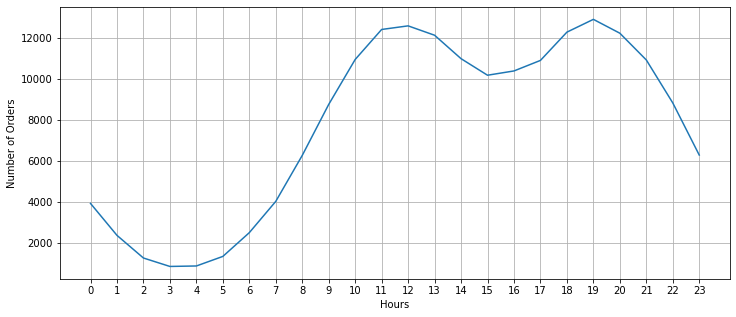

In [86]:
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.figure(figsize=(12,5))
plt.plot(hours, all_data.groupby('Hour')['Minute'].count())
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.xticks(hours);

## 4. What products are the most often sold together?

In [92]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [93]:
from itertools import combinations
from collections import Counter

In [96]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it is sold the most?

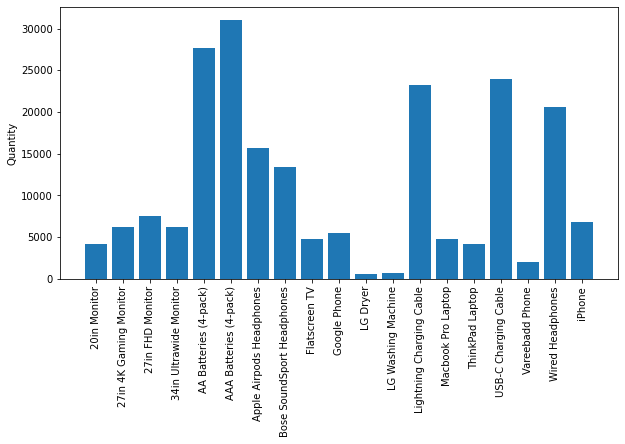

In [107]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product,df in product_group]
plt.figure(figsize=(10,5))
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity')
plt.xticks(products, rotation='vertical');

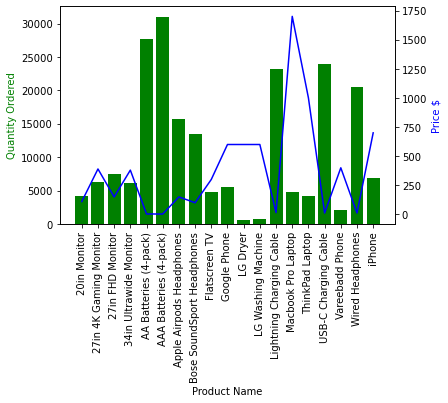

In [115]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2= ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', c='g')
ax2.set_ylabel('Price $', c='b')
ax1.set_xticklabels(products, rotation='vertical');